# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-04-07.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-06,2024-04-07,890.780752,938.979210,886.936745,906.208379,7.565334e+10,1.616573e+11
1,2024-04-05,2024-04-06,889.854757,905.502835,846.265092,894.846138,7.246116e+10,1.556930e+11
2,2024-04-04,2024-04-05,877.690759,927.671819,863.960901,894.425690,7.099052e+10,1.561048e+11
3,2024-04-03,2024-04-04,886.188334,929.530345,859.840030,879.586602,9.566956e+10,1.553503e+11
4,2024-04-02,2024-04-03,992.271193,992.446894,887.899741,890.927552,1.048024e+11,1.560993e+11


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-06,2024-04-07,890.780752,938.979210,886.936745,906.208379,7.565334e+10,1.616573e+11
1,2024-04-05,2024-04-06,889.854757,905.502835,846.265092,894.846138,7.246116e+10,1.556930e+11
2,2024-04-04,2024-04-05,877.690759,927.671819,863.960901,894.425690,7.099052e+10,1.561048e+11
3,2024-04-03,2024-04-04,886.188334,929.530345,859.840030,879.586602,9.566956e+10,1.553503e+11
4,2024-04-02,2024-04-03,992.271193,992.446894,887.899741,890.927552,1.048024e+11,1.560993e+11
...,...,...,...,...,...,...,...,...
253,2023-07-28,2023-07-29,269.412846,289.878625,267.642948,288.979025,6.077311e+10,2.953945e+10
254,2023-07-27,2023-07-28,291.035492,299.287945,271.829975,273.141821,9.588054e+10,3.005312e+10
255,2023-07-26,2023-07-27,297.283383,325.197377,285.743239,292.549497,1.916170e+11,3.200305e+10
256,2023-07-25,2023-07-26,281.872222,313.259330,248.828286,296.497094,1.757652e+11,2.923950e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,258,258,258.000000,258.000000,258.000000,258.000000,2.580000e+02,2.580000e+02
mean,2023-11-29 12:00:00,2023-11-30 12:00:00,425.972823,454.455928,404.571977,428.603258,8.828542e+10,5.699053e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,131.132606,134.887795,126.613823,130.926112,1.136242e+10,1.712790e+10
25%,2023-09-26 06:00:00,2023-09-27 06:00:00,218.340849,232.583059,211.746826,217.672223,2.769398e+10,2.673836e+10
50%,2023-11-29 12:00:00,2023-11-30 12:00:00,304.648220,320.462953,294.765628,305.931797,4.700659e+10,3.628125e+10
75%,2024-02-01 18:00:00,2024-02-02 18:00:00,455.089871,488.423247,440.167729,458.137758,9.727559e+10,4.848904e+10
max,2024-04-06 00:00:00,2024-04-07 00:00:00,1515.853013,1530.514760,1223.673771,1504.479761,5.776873e+11,1.950724e+11
std,NaN,NaN,322.476262,346.994794,300.199876,323.549016,1.074909e+11,5.151867e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       258 non-null    datetime64[ns]
 1   End         258 non-null    datetime64[ns]
 2   Open        258 non-null    float64       
 3   High        258 non-null    float64       
 4   Low         258 non-null    float64       
 5   Close       258 non-null    float64       
 6   Volume      258 non-null    float64       
 7   Market Cap  258 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 16.2 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


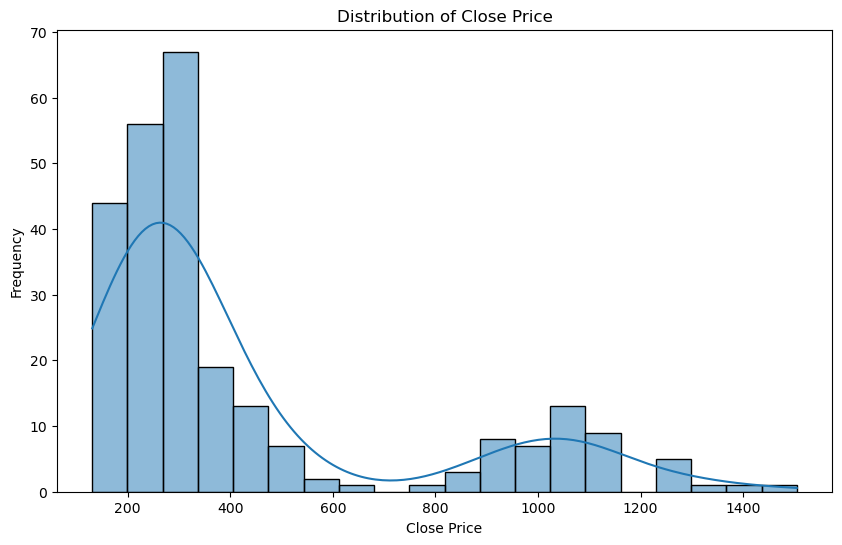

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

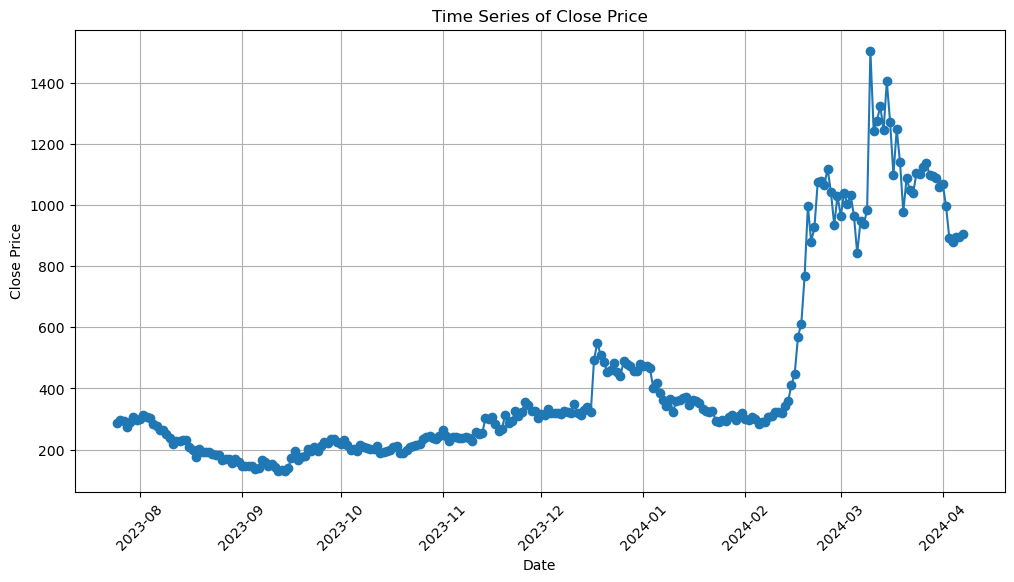

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], marker='o', linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 695.0642956522778


In [13]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 2532.391180717298
Gradient Boosting Mean Squared Error: 8676.171702316713
Support Vector Regressor Mean Squared Error: 20550.835561851785


### Testing the models

In [24]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1003.83447517]


In [26]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
